In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sys.path.append('/users/mtaranov/LongRange3D/')
from models import RandomForest, SVC
from metrics import ClassificationResult
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 1: GeForce GTX TITAN X (CNMeM is enabled with initial size: 2500 MB, cuDNN 5005)


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
contacts='PP'
path='/users/mtaranov/datasets_3d_OLD/dist_matched_'+contacts+'/'
X_train = get_features(path+'X_train_thres_10.npy')
y_train = get_labels(path+'y_train_thres_10.npy')
X_valid = get_features(path+'X_valid_thres_10.npy')
y_valid = get_labels(path+'y_valid_thres_10.npy')
X_test = get_features(path+'X_test_thres_10.npy')
y_test = get_labels(path+'y_test_thres_10.npy')

In [3]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

In [4]:
X_train_pairs = X_train_normalized.reshape(X_train_normalized.shape[0],X_train_normalized.shape[2]*X_train_normalized.shape[3])
X_valid_pairs = X_valid_normalized.reshape(X_valid_normalized.shape[0],X_valid_normalized.shape[2]*X_valid_normalized.shape[3])
X_test_pairs = X_test_normalized.reshape(X_test_normalized.shape[0],X_test_normalized.shape[2]*X_test_normalized.shape[3])

# Random Forest

In [22]:
from models import RandomForest, SVC
rf = RandomForest()

### w/o genomic locations

In [38]:
rf.train(X_train_pairs[:,:20], y_train)
preds_test = rf.predict(X_test_pairs[:,:20])
preds_train = rf.predict(X_train_pairs[:,:20])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 72.71%	 auROC: 0.794	 auPRC: 0.823	 auPRG: 0.617
Recall at 5%|10%|20% FDR: 30.1%|33.2%|61.1%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 99.83%	 auROC: 1.000	 auPRC: 1.000	 auPRG: 1.000
Recall at 5%|10%|20% FDR: 100.0%|100.0%|100.0%	 Num Positives: 576	 Num Negatives: 576	 



In [58]:
#v=rf.ImportanceSelect(X_train_pairs, 4)
scores=rf.ImportanceSelect().reshape(scores.shape[0],1)

In [59]:
scores.shape

(20, 1)

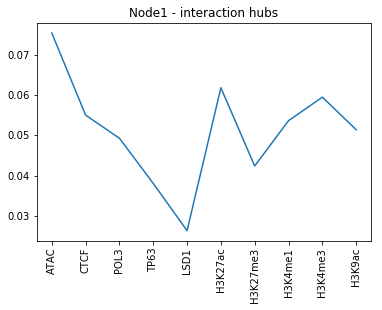

In [74]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
plt.plot(scores[0:20:2])
x = [float(j) for j in range(np.shape(scores)[0]/2)]
plt.xticks(x, features, rotation='vertical')
plt.title('Node1 - interaction hubs')

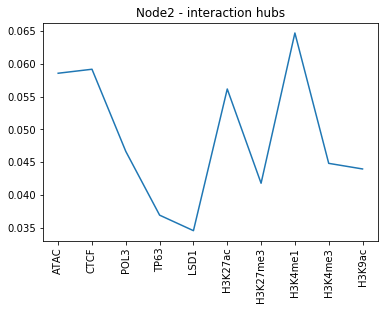

In [75]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
plt.plot(scores[1:21:2])
x = [float(j) for j in range(np.shape(scores)[0]/2)]
plt.xticks(x, features, rotation='vertical')
plt.title('Node2 - interaction hubs')

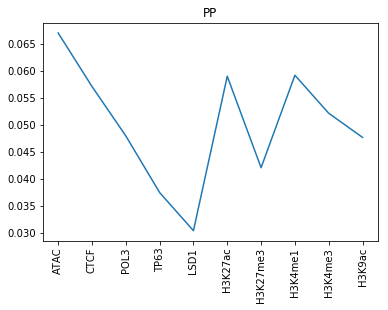

In [77]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
plt.plot(np.mean(np.concatenate((scores[0:20:2], scores[1:21:2]), axis=1), axis=1))
x = [float(j) for j in range(np.shape(scores)[0]/2)]
plt.xticks(x, features, rotation='vertical')    
plt.title('PP')